In [17]:
cd /Users/angli/Documents/GitHub/ToxicCommentsClassification

/Users/angli/Documents/GitHub/ToxicCommentsClassification


In [15]:
ls

Data Description.txt*       test.csv*
all_clean_comments_lst.pkl* test.csv.zip*
all_toxic_comments_lst.pkl  test_features.csv
dictionary/                 train.csv*
sample_submission.csv*      train.csv.zip*
sample_submission.csv.zip*  train_features.csv


In [2]:
import sklearn
print (sklearn.__version__)

0.19.1


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import log_loss

In [5]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set_style("dark")
#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
#from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
#from keras.layers import Bidirectional, GlobalMaxPool1D
#from keras.models import Model
#from keras import initializers, regularizers, constraints, optimizers, layers

In [16]:
train = pd.read_csv("/Users/angli/Ang/OneDrive/Documents/Pitt_PhD/Class/2018Spring/ML/finalProject/data/train_features.csv")
test = pd.read_csv("/Users/angli/Ang/OneDrive/Documents/Pitt_PhD/Class/2018Spring/ML/finalProject/data/test_features.csv")

In [45]:
test.columns.values

array(['id', 'total_length', 'capitals', 'caps_vs_length',
       'num_exclamation_marks', 'num_question_marks', 'num_punctuation',
       'num_symbols', 'num_we', 'num_words', 'num_unique_words',
       'words_vs_unique', 'num_smilies', 'num_IP', 'num_URL',
       'num_positive', 'num_negtive', 'score'], dtype=object)

In [46]:
train = train.set_index('id')
test = test.set_index('id')
train.columns.values

array(['total_length', 'capitals', 'caps_vs_length',
       'num_exclamation_marks', 'num_question_marks', 'num_punctuation',
       'num_symbols', 'num_we', 'num_words', 'num_unique_words',
       'words_vs_unique', 'num_smilies', 'num_IP', 'num_URL',
       'num_positive', 'num_negtive', 'score', 'toxic', 'severe_toxic',
       'obscene', 'threat', 'insult', 'identity_hate'], dtype=object)

In [8]:
len(list(set(list(train['id']))))

159571

In [9]:
test.shape

(153164, 18)

In [10]:
train.head(5)

,id,total_length,capitals,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_we,num_words,...,num_URL,num_positive,num_negtive,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,264,17,0.064394,0,1,6,0,2,42,...,0,1,8,0.036475,0,0,0,0,0,0
1,000103f0d9cfb60f,112,8,0.071428,1,0,5,0,0,18,...,0,1,1,0.000000,0,0,0,0,0,0
2,000113f07ec002fd,233,4,0.017167,0,0,4,0,0,42,...,0,0,3,0.030142,0,0,0,0,0,0
3,0001b41b1c6bb37e,622,11,0.017685,0,0,6,0,1,112,...,0,8,8,0.014241,0,0,0,0,0,0
4,0001d958c54c6e35,67,2,0.029850,0,1,3,0,0,13,...,0,1,0,0.010845,0,0,0,0,0,0


Check nulls for both testing and training dataset

### feature exploration

In [11]:
train.columns.values

array(['id', 'total_length', 'capitals', 'caps_vs_length',
       'num_exclamation_marks', 'num_question_marks', 'num_punctuation',
       'num_symbols', 'num_we', 'num_words', 'num_unique_words',
       'words_vs_unique', 'num_smilies', 'num_IP', 'num_URL',
       'num_positive', 'num_negtive', 'score', 'toxic', 'severe_toxic',
       'obscene', 'threat', 'insult', 'identity_hate'], dtype=object)

In [ ]:
rowsums=train.iloc[:,18:].sum(axis=1)
train['clean']=(rowsums==0)
train['clean'].sum()

In [19]:
#count each severity 
print('Total rows in train is {}'.format(len(train)))
print(train.iloc[:,18:].sum())
print('toxic: %d' % train[train['toxic'] > 0]['toxic'].count())
print('severe_toxic: %d' % train[train['severe_toxic'] > 0]['severe_toxic'].count())
print('obscene: %d' % train[train['obscene'] > 0]['obscene'].count())
print('threat: %d' % train[train['threat'] > 0]['threat'].count())
print('insult: %d' % train[train['insult'] > 0]['insult'].count())
print('identity_hate: %d' % train[train['identity_hate'] > 0]['identity_hate'].count())

Total rows in train is 159571
toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64
toxic: 15294
severe_toxic: 1595
obscene: 8449
threat: 478
insult: 7877
identity_hate: 1405


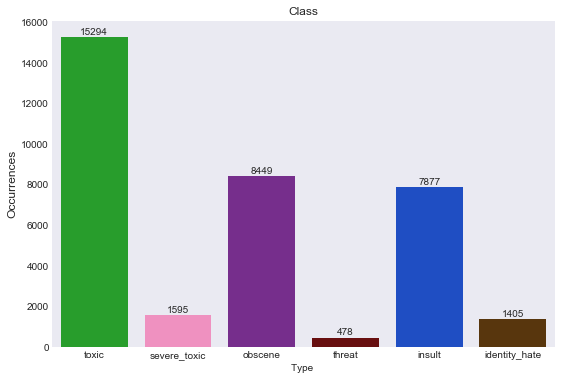

In [14]:
colors_list = ["green", "pink", "purple",
               "blood", "blue", "brown", "grey"]

palette= sns.xkcd_palette(colors_list)

x=train.iloc[:,18:].sum()

plt.figure(figsize=(9,6))
ax= sns.barplot(x.index, x.values,palette=palette)
plt.title("Class")
plt.ylabel('Occurrences', fontsize=12)
plt.xlabel('Type ')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')

plt.show()

In [13]:
print("percentage of labeled data is: ", (159571 - 143346)/159571)

percentage of labeled data is:  0.10167887648758234


In [ ]:
palette= sns.xkcd_palette(colors_list)

x=train.iloc[:,2:].sum()

plt.figure(figsize=(9,6))
ax= sns.barplot(x.index, x.values,palette=palette)
plt.title("Class")
plt.ylabel('Occurrences', fontsize=12)
plt.xlabel('Type ')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')

plt.show()

(array([20055., 26441., 21344., 16905., 12780., 10289.,  7780.,  6178.,
         4925.,  3924.,  3512.,  2830.,  2363.,  2082.,  1693.,  1520.,
         1379.,  1287.,  1112.,   902.,   826.,   759.,   607.,   568.,
          669.,   469.,   470.,   441.,   316.,   256.,   274.,   236.,
          211.,   202.,   176.,   162.,   150.,   153.,   150.,   138.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
        390, 400]),
 <a list of 40 Patch objects>)

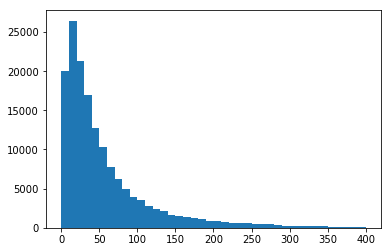

In [12]:
plt.hist(list(train["num_words"]),bins = np.arange(0,410,10))

(array([69218., 38477., 19033., 10535.,  6243.,  4111.,  2928.,  1975.,
         1309.,   986.,   875.,   607.,   512.,   556.,   316.,   252.,
          235.,   196.,   156.,   166.,   134.,   101.,    97.,   118.]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38, 40, 42, 44, 46, 48]),
 <a list of 24 Patch objects>)

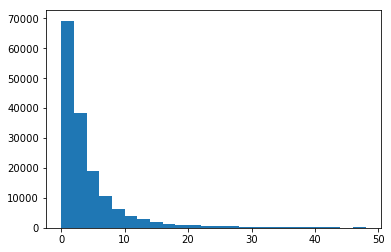

In [17]:
plt.hist(list(train["num_positive"]),bins = np.arange(0,50,2))

(array([44376., 35861., 22052., 14479.,  9941.,  7163.,  5207.,  3759.,
         2746.,  2179.,  1717.,  1307.,  1198.,   982.,   682.,   703.,
          516.,   491.,   339.,   302.,   272.,   268.,   243.,   314.]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38, 40, 42, 44, 46, 48]),
 <a list of 24 Patch objects>)

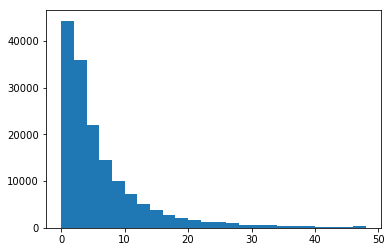

In [19]:
plt.hist(list(train["num_negtive"]),bins = np.arange(0,50,2))

### prediction

In [47]:
cols=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y=train[cols]
x = train[['total_length', 'capitals', 'caps_vs_length',
       'num_exclamation_marks', 'num_question_marks', 'num_punctuation',
       'num_symbols', 'num_we', 'num_words', 'num_unique_words',
       'words_vs_unique', 'num_smilies', 'num_IP', 'num_URL',
       'num_positive', 'num_negtive', 'score']]

In [48]:
train.columns.values

array(['total_length', 'capitals', 'caps_vs_length',
       'num_exclamation_marks', 'num_question_marks', 'num_punctuation',
       'num_symbols', 'num_we', 'num_words', 'num_unique_words',
       'words_vs_unique', 'num_smilies', 'num_IP', 'num_URL',
       'num_positive', 'num_negtive', 'score', 'toxic', 'severe_toxic',
       'obscene', 'threat', 'insult', 'identity_hate'], dtype=object)

In [49]:
xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, 
                                                  random_state=42, 
                                                  test_size=0.3, shuffle=True)

In [34]:
ytrain[col].describe()

count    111699.000000
mean          0.095901
std           0.294456
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: toxic, dtype: float64

In [50]:
prd_valid = np.zeros((xvalid.shape[0],yvalid.shape[1]))
prd_train = np.zeros((xtrain.shape[0],ytrain.shape[1]))
train_loss = []
valid_loss = []
bnb = LogisticRegression(penalty='l2')
for i,col in enumerate(cols):
    print('Building {} model for column:{''}'.format(i,col)) 
    bnb.fit(xtrain,ytrain[col])
    prd_valid[:,i] = bnb.predict_proba(xvalid)[:,1]
    prd_train[:,i] = bnb.predict_proba(xtrain)[:,1]
    train_loss_class=log_loss(ytrain[col],prd_train[:,i])
    valid_loss_class=log_loss(yvalid[col],prd_valid[:,i])
    print('Trainloss=log loss:', train_loss_class)
    print('Validloss=log loss:', valid_loss_class)
    train_loss.append(train_loss_class)
    valid_loss.append(valid_loss_class)
print('mean column-wise log loss:Train dataset', np.mean(train_loss))
print('mean column-wise log loss:Validation dataset', np.mean(valid_loss))

Building 0 model for column:toxic
Trainloss=log loss: 0.2756871425001205
Validloss=log loss: 0.27682768618019055
Building 1 model for column:severe_toxic
Trainloss=log loss: 0.058361376007330726
Validloss=log loss: 0.05994337927153037
Building 2 model for column:obscene
Trainloss=log loss: 0.2221449159820592
Validloss=log loss: 0.22771454738776203
Building 3 model for column:threat
Trainloss=log loss: 0.046347604722719093
Validloss=log loss: 0.04110040327317813
Building 4 model for column:insult
Trainloss=log loss: 0.2262228878152726
Validloss=log loss: 0.23165584006249212
Building 5 model for column:identity_hate
Trainloss=log loss: 0.05728644514630244
Validloss=log loss: 0.05891142823391471
mean column-wise log loss:Train dataset 0.1476750620289674
mean column-wise log loss:Validation dataset 0.14935888073484463
